# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [24]:
# Import libraries
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt 
from tqdm import tqdm
from tqdm import trange
import multiprocessing as mp
from sklearn.model_selection import train_test_split as tts
%matplotlib inline

In [25]:
# Your code here
data = pd.read_csv('data_all.zip')
data.head(10)

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
data.shape

(116322, 785)

In [27]:
data.columns

Index(['e', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=785)

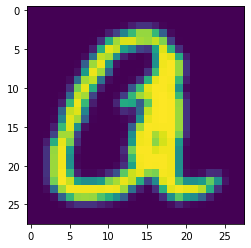

In [28]:
plt.figure(figsize=(4,4))
plt.imshow(data.values[0,1:].reshape(28,28))        # [rows,columns:]  
plt.show()

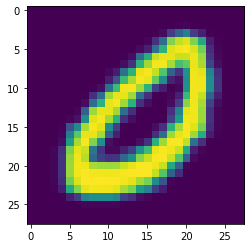

In [29]:
plt.figure(figsize=(4,4))
plt.imshow(data.values[1,1:].reshape(28,28))  
plt.show()

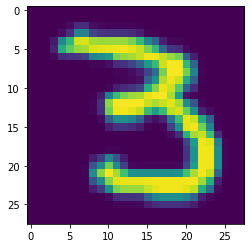

In [30]:
plt.figure(figsize=(4,4))
plt.imshow(data.values[2,1:].reshape(28,28))  
plt.show()

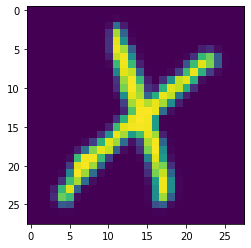

In [31]:
plt.figure(figsize=(4,4))
plt.imshow(data.values[3,1:].reshape(28,28))  
plt.show()

In [32]:
print('As we can see in the numbers in the column e tells us if the row contains a number or a letter image')

As we can see in the numbers in the column e tells us if the row contains a number or a letter image


In [33]:
lista = data.e.value_counts().index.tolist()
print(lista)

[1.0, 7.0, 3.0, 2.0, 0.0, 6.0, 9.0, 8.0, 4.0, 5.0, 24.0, 40.0, 28.0, 55.0, 47.0, 53.0, 18.0, 30.0, 49.0, 12.0, 39.0, 36.0, 29.0, 22.0, 43.0, 15.0, 25.0, 23.0, 10.0, 37.0, 14.0, 21.0, 27.0, 32.0, 34.0, 31.0, 13.0, 11.0, 19.0, 42.0, 17.0, 52.0, 56.0, 59.0, 57.0, 58.0, 46.0, 50.0, 35.0, 48.0, 61.0, 16.0, 54.0, 38.0, 33.0, 44.0, 26.0, 41.0, 20.0, 60.0, 51.0, 45.0]


From 0 to 9 are numbers, from 10 to 35 are capital letters, and from 36 to 61 are lowercase.

In [34]:
def clasification(x):
    if 0<=x<=9:
        return 1
    elif 10<=x<=35:
        return 2
    elif 36<=x<=61:
        return 3
data['class'] = data.e.apply(clasification)

In [35]:
data['class'].value_counts()

1    57918
2    31345
3    27059
Name: class, dtype: int64

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [36]:
# Your code here
capitals = data[data['class'] == 2]
data_capitals = capitals.drop(['class'],axis = 1)
data_capitals.shape

(31345, 785)

In [42]:
data_capitals.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# X normalized between 0 and 1 because each immage has 255 pixels
# X is an array with dimentions (31345, 784) without the column e
X = data_capitals.drop(['e'],axis = 1)
# An array with 31345 numbers data.e
y = data_capitals.e

In [47]:
# Using TTS
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)

In [48]:
#Stocastic gradient descent
from sklearn.linear_model import SGDClassifier as SGDC
X_train_v, X_test_v, y_train_v, y_test_v = tts(X, y)
sgdc=SGDC(max_iter=8000)

sgdc.fit(X_train_v, y_train_v)

train_score=sgdc.score(X_train_v, y_train_v) # Accuracy
test_score=sgdc.score(X_test_v, y_test_v)

print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.7966649651182576 -- test Acc: 0.7106035472757433


In [49]:
# Naive Balles
from sklearn.naive_bayes import ComplementNB as CNB
cnb=CNB()
cnb.fit(X_train, y_train)
train_score=cnb.score(X_train, y_train) # Accuracy
test_score=cnb.score(X_test, y_test)
print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.49581272930291914 -- test Acc: 0.4936991545701069


In [50]:
from sklearn.naive_bayes import BernoulliNB as BNB
bnb=BNB()
bnb.fit(X_train, y_train)
train_score=bnb.score(X_train, y_train) # Accuracy
test_score=bnb.score(X_test, y_test)
print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.6967219652257138 -- test Acc: 0.6899026958047535


In [51]:
from sklearn.naive_bayes import MultinomialNB as MNB
mnb=MNB()
mnb.fit(X_train, y_train)
train_score=mnb.score(X_train, y_train) # Accuracy
test_score=mnb.score(X_test, y_test)
print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.6954458446323177 -- test Acc: 0.6859148189503909


In [52]:
# Catboost
'''from catboost import CatBoostClassifier as CTC

ctc=CTC(verbose=0)
ctc.fit(X_train_v, y_train_v)

train_score=ctc.score(X_train_v, y_train_v) 
test_score=ctc.score(X_test_v, y_test_v)

print ('train Acc:',train_score, '-- test Acc:', test_score)'''

"from catboost import CatBoostClassifier as CTC\n\nctc=CTC(verbose=0)\nctc.fit(X_train_v, y_train_v)\n\ntrain_score=ctc.score(X_train_v, y_train_v) \ntest_score=ctc.score(X_test_v, y_test_v)\n\nprint ('train Acc:',train_score, '-- test Acc:', test_score)"

In [53]:
capital = pd.DataFrame()
y_test.reset_index(drop=True, inplace=True)
capital['sgdc'] = sgdc.predict(X_test)
capital['mnb'] = mnb.predict(X_test)
capital['cnb'] = cnb.predict(X_test)
capital['bnb'] = bnb.predict(X_test)
capital['REAL']=y_test

In [55]:
capital.head()

,sgdc,mnb,cnb,bnb,REAL
0,29.0,29.0,29.0,29.0,29.0
1,18.0,18.0,18.0,18.0,18.0
2,29.0,29.0,29.0,29.0,29.0
3,24.0,24.0,24.0,24.0,24.0
4,19.0,15.0,18.0,15.0,15.0


* Try to do the same thing with lowercases.

In [58]:
# Your code here
lower_cases = data[data['class'] == 3]
data_lowers = capitals.drop(['class'],axis = 1)
data_lowers.shape

(31345, 785)

In [59]:
# X normalized between 0 and 1 because each immage has 255 pixels
# X is an array with dimentions (31345, 784) without the column e
X = data_lowers.drop(['e'],axis = 1)
# An array with 31345 numbers data.e
y = data_lowers.e

In [60]:
# Using TTS
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)

In [61]:
from sklearn.linear_model import SGDClassifier as SGDC
X_train_v, X_test_v, y_train_v, y_test_v = tts(X, y)
sgdc=SGDC(max_iter=8000)

sgdc.fit(X_train_v, y_train_v)

train_score=sgdc.score(X_train_v, y_train_v) # Accuracy
test_score=sgdc.score(X_test_v, y_test_v)

print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.7758209971073677 -- test Acc: 0.6983539619752457


In [62]:
# Naive Balles
from sklearn.naive_bayes import ComplementNB as CNB
cnb=CNB()
cnb.fit(X_train, y_train)
train_score=cnb.score(X_train, y_train) # Accuracy
test_score=cnb.score(X_test, y_test)
print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.49557345669165737 -- test Acc: 0.4908278832349657


In [63]:
from sklearn.naive_bayes import BernoulliNB as BNB
bnb=BNB()
bnb.fit(X_train, y_train)
train_score=bnb.score(X_train, y_train) # Accuracy
test_score=bnb.score(X_test, y_test)
print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.6979183282820226 -- test Acc: 0.6918168766948477


In [64]:
from sklearn.naive_bayes import MultinomialNB as MNB
mnb=MNB()
mnb.fit(X_train, y_train)
train_score=mnb.score(X_train, y_train) # Accuracy
test_score=mnb.score(X_test, y_test)
print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.6946482692614452 -- test Acc: 0.6922954219173711


In [65]:
# Catboost
'''from catboost import CatBoostClassifier as CTC

ctc=CTC(verbose=0)
ctc.fit(X_train_v, y_train_v)

train_score=ctc.score(X_train_v, y_train_v) 
test_score=ctc.score(X_test_v, y_test_v)

print ('train Acc:',train_score, '-- test Acc:', test_score)'''

"from catboost import CatBoostClassifier as CTC\n\nctc=CTC(verbose=0)\nctc.fit(X_train_v, y_train_v)\n\ntrain_score=ctc.score(X_train_v, y_train_v) \ntest_score=ctc.score(X_test_v, y_test_v)\n\nprint ('train Acc:',train_score, '-- test Acc:', test_score)"

In [66]:
lower = pd.DataFrame()
y_test.reset_index(drop=True, inplace=True)
lower['sgdc'] = sgdc.predict(X_test)
lower['mnb'] = mnb.predict(X_test)
lower['cnb'] = cnb.predict(X_test)
lower['bnb'] = bnb.predict(X_test)
lower['REAL']=y_test

In [67]:
lower.head()


,sgdc,mnb,cnb,bnb,REAL
0,28.0,28.0,28.0,28.0,28.0
1,12.0,12.0,12.0,12.0,12.0
2,31.0,31.0,31.0,31.0,31.0
3,28.0,28.0,28.0,28.0,28.0
4,23.0,17.0,28.0,31.0,31.0


* Try to do the same thing with numbers.

In [68]:
# Your code here
from sklearn.ensemble import RandomForestRegressor as RFR

In [69]:
numbers = data[data['class'] == 1]
numbers = capitals.drop(['class'],axis = 1)
numbers.shape

(31345, 785)

In [70]:
# X normalized between 0 and 1 because each immage has 255 pixels
# X is an array with dimentions (31345, 784) without the column e
X = numbers.drop(['e'],axis = 1)
# An array with 31345 numbers data.e
y = numbers.e

In [71]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)

In [72]:
rfr=RFR()
rfr.fit(X_train, y_train)

train_score=rfr.score(X_train, y_train)    # R2
test_score=rfr.score(X_test, y_test)

print (train_score, test_score)

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9383121455591172 0.6685042947678879


In [73]:
#Gradiente descendente estocastico
from sklearn.linear_model import SGDRegressor as SGDR

X_train_d, X_test_d, y_train_d, y_test_d = tts(X, y)
sgdr=SGDR(max_iter=8000)

sgdr.fit(X_train_d, y_train_d)

train_score=sgdr.score(X_train_d, y_train_d) #R2
test_score=sgdr.score(X_test_d, y_test_d)

print ('train R2:',train_score, '-- test R2:', test_score)

train R2: -5.65828200483658e+28 -- test R2: -5.48720468520267e+28


In [74]:
nums = pd.DataFrame()
y_test.reset_index(drop=True, inplace=True)
nums['sgdc'] = sgdc.predict(X_test)
nums['rfr'] = rfr.predict(X_test)
nums['REAL']=y_test

In [76]:
nums.head()

,sgdc,rfr,REAL
0,35.0,31.9,35.0
1,22.0,18.7,22.0
2,14.0,25.6,28.0
3,32.0,31.0,32.0
4,28.0,27.8,28.0
